C:\Users\Vishrut\AppData\Local\Temp\ipykernel_12332\3468481720.py:38: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


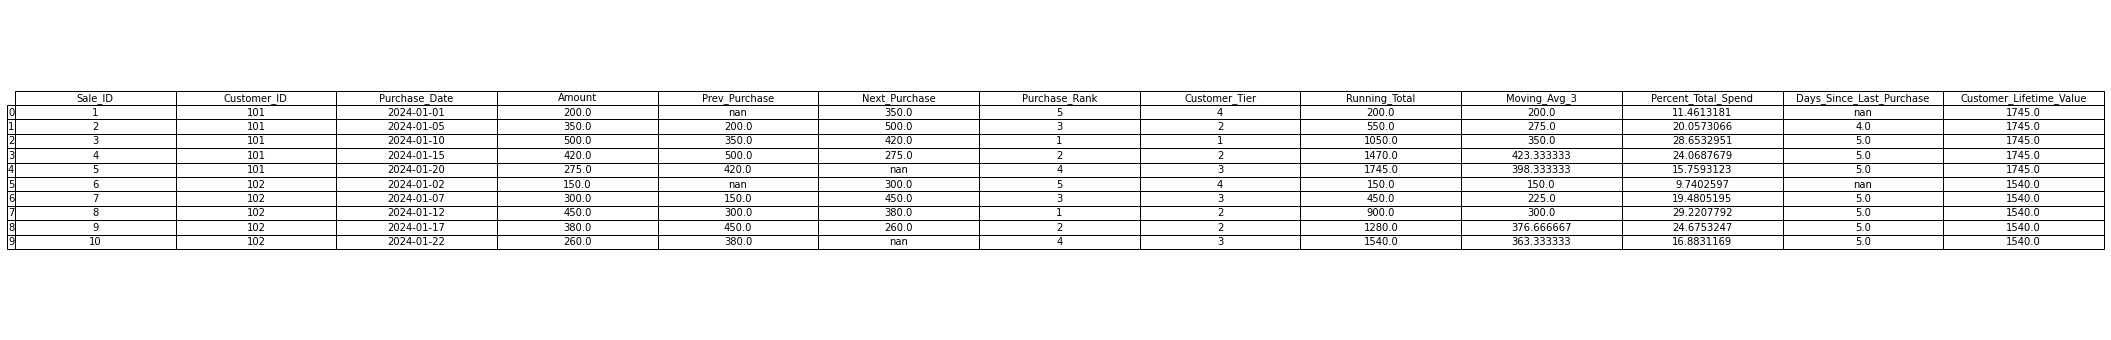

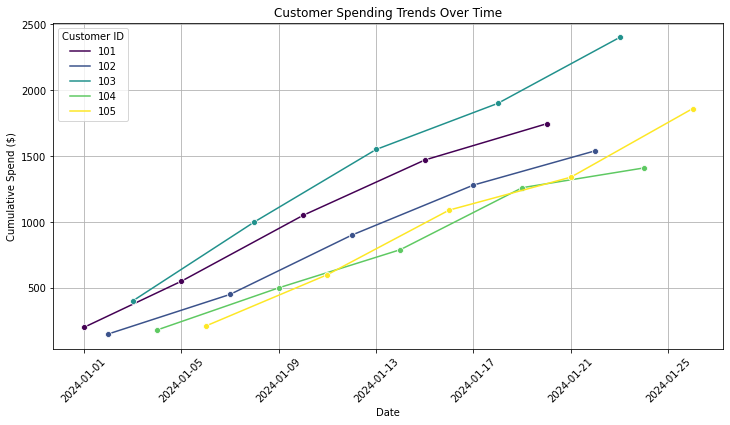

In [9]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import table

# Database Connection
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="durga",
    database="challenge"
)

# SQL Query Execution
query = """
SELECT 
    Sale_ID, 
    Customer_ID, 
    Purchase_Date, 
    Amount,

    LAG(Amount) OVER (PARTITION BY Customer_ID ORDER BY Purchase_Date) AS Prev_Purchase,
    LEAD(Amount) OVER (PARTITION BY Customer_ID ORDER BY Purchase_Date) AS Next_Purchase,
    DENSE_RANK() OVER (PARTITION BY Customer_ID ORDER BY Amount DESC) AS Purchase_Rank,
    NTILE(4) OVER (ORDER BY Amount DESC) AS Customer_Tier,
    SUM(Amount) OVER (PARTITION BY Customer_ID ORDER BY Purchase_Date ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) AS Running_Total,
    AVG(Amount) OVER (PARTITION BY Customer_ID ORDER BY Purchase_Date ROWS BETWEEN 2 PRECEDING AND CURRENT ROW) AS Moving_Avg_3,
    Amount * 100.0 / SUM(Amount) OVER (PARTITION BY Customer_ID) AS Percent_Total_Spend,
    DATEDIFF(Purchase_Date, LAG(Purchase_Date) OVER (PARTITION BY Customer_ID ORDER BY Purchase_Date)) AS Days_Since_Last_Purchase,
    SUM(Amount) OVER (PARTITION BY Customer_ID) AS Customer_Lifetime_Value

FROM Sales
ORDER BY Customer_ID, Purchase_Date;
"""

# Load Data into Pandas DataFrame
df = pd.read_sql(query, conn)
conn.close()

# Display Data in Jupyter Notebook or Script
# import ace_tools as tools  # Using ace_tools to display dataframe
# tools.display_dataframe_to_user(name="SQL Advanced Analysis", dataframe=df)

# Save DataFrame as an Image for LinkedIn Post
fig, ax = plt.subplots(figsize=(12, 6))  # Set figure size
ax.axis('off')  # Hide axes

# Create Table
table_data = table(ax, df.head(10), loc='center', cellLoc='center', colWidths=[0.2]*len(df.columns))
table_data.auto_set_font_size(False)
table_data.set_fontsize(10)
table_data.scale(1.2, 1.2)  # Adjust table size

# Save Table Image
plt.savefig("SQL_Advanced_Analysis.png", dpi=300, bbox_inches='tight')

# Trend Visualization: Customer Spending Over Time
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x="Purchase_Date", y="Running_Total", hue="Customer_ID", marker="o", palette="viridis")
plt.xlabel("Date")
plt.ylabel("Cumulative Spend ($)")
plt.title("Customer Spending Trends Over Time")
plt.legend(title="Customer ID")
plt.xticks(rotation=45)
plt.grid(True)

# Save Graph
plt.savefig("SQL_Trend_Analysis.png", dpi=300, bbox_inches='tight')

# Show Graph
plt.show()


  Obtaining dependency information for ace_tools from https://files.pythonhosted.org/packages/27/c4/402d3ae2ecbfe72fbdcb2769f55580f1c54a3ca110c44e1efc034516a499/ace_tools-0.0-py3-none-any.whl.metadata



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
